In [1]:
%load_ext autotime

time: 494 µs (started: 2021-12-30 12:26:53 +01:00)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from bs4 import BeautifulSoup
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer


time: 5.92 s (started: 2021-12-30 12:26:53 +01:00)


# 1 - Import data

In [3]:
lst = []
for i in range (1,11):
#for i in range (1,3):
    path = 'Data/Query_'+ str(i) + '.csv'
    mDf = pd.read_csv(path, dtype=str) 
    lst.append(mDf)

time: 9.95 s (started: 2021-12-30 12:26:59 +01:00)


In [5]:
mDataBrut  = pd.concat(lst, ignore_index=True)
mDataBrut.to_csv('mDataBrut.csv', index=False)

time: 13.7 s (started: 2021-12-30 12:28:08 +01:00)


In [6]:
mDataBrut

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,100001,1,NaN,NaN,2008-09-19 06:10:16,NaN,5,6715,<p>This question intends to be technology-agno...,18552,...,NaN,2009-02-27 00:27:14,MVC or event-driven component-oriented web fra...,<web-frameworks>,6,0,1,2012-08-15 13:39:14,NaN,CC BY-SA 2.5
1,100003,1,100146,NaN,2008-09-19 06:10:46,NaN,6435,939655,"<p>In Python, what are metaclasses and what do...",9951,...,2021-01-13 03:43:24,2021-10-03 16:06:40,What are metaclasses in Python?,<python><oop><metaclass><python-class><python-...,24,0,4115,NaN,NaN,CC BY-SA 4.0
2,100004,2,NaN,99830,2008-09-19 06:11:42,NaN,5,NaN,"<p>Yes, that's actually very annoying. We use...",14860,...,NaN,2008-09-19 06:11:42,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
3,100007,1,100961,NaN,2008-09-19 06:12:37,NaN,2,1899,<p>When logging with Log4Net it's very easy to...,11908,...,2014-12-04 10:01:14,2014-12-04 10:01:14,Logging Application Block - Logging the caller,<c#><logging><enterprise-library><application-...,2,0,NaN,NaN,NaN,CC BY-SA 3.0
4,100008,2,NaN,99743,2008-09-19 06:12:48,NaN,0,NaN,"<p>I use <a href=""http://devguard.com/"" rel=""n...",16549,...,NaN,2008-09-19 06:12:48,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,69847370,2,NaN,69846609,2021-11-05 00:28:43,NaN,2,NaN,<p>You can use <code>tf.gather</code> with the...,17289463,...,NaN,2021-11-05 00:28:43,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
499996,69850769,2,NaN,69849359,2021-11-05 09:04:35,NaN,0,NaN,"<pre><code>std::vector&lt;T&gt; v(100, t);\nf(...",2684539,...,NaN,2021-11-05 09:04:35,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
499997,69850770,2,NaN,69849405,2021-11-05 09:04:36,NaN,0,NaN,<p>I was able to solve it by changing the arro...,14212342,...,2021-11-05 10:38:44,2021-11-05 10:38:44,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
499998,69850771,2,NaN,69828586,2021-11-05 09:04:39,NaN,0,NaN,"<p>After some traces, I did some changes and i...",6587821,...,2021-11-05 09:15:51,2021-11-05 09:15:51,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0


time: 280 ms (started: 2021-12-30 12:36:52 +01:00)


In [3]:
lst = []
for i in range (1,11):
#for i in range (1,3):
    path = 'Data/Query_'+ str(i) + '.csv'
    mDf = pd.read_csv(path, dtype=str) 
    print(mDf.shape)
    print(mDf.columns)
    mDf = mDf[['Tags', 'Body', 'Title']]
    lst.append(mDf)

(50000, 23)
Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],
      dtype='object')
(50000, 23)
Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],
      dtype='object')
(50000, 23)
Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUs

In [4]:
mDf = pd.concat(lst, ignore_index=True)
mDf = mDf[mDf['Tags'].notna()]
mDf = mDf[mDf['Title'].notna()]
mDf = mDf.rename(columns={'Body': "Txt"})
mDf

,Tags,Txt,Title
0,<web-frameworks>,<p>This question intends to be technology-agno...,MVC or event-driven component-oriented web fra...
1,<python><oop><metaclass><python-class><python-...,"<p>In Python, what are metaclasses and what do...",What are metaclasses in Python?
3,<c#><logging><enterprise-library><application-...,<p>When logging with Log4Net it's very easy to...,Logging Application Block - Logging the caller
19,<php><facebook><rss>,<p>How can I make a Facebook RSS application t...,Facebook RSS application
22,<c#><regex>,<p>What is a good regular expression that can ...,Regular expressions in C# for file name valida...
...,...,...,...
499987,<java><spring><ubuntu><tomcat><mariadb>,<p>I got an error while trying to build war fi...,Build war file: java.sql.SQLInvalidAuthorizati...
499988,<apache-iotdb>,<p>When I finish the configuration ”Example of...,I can't start IoTDB cluster
499989,<node.js><linux><docker><selenium-webdriver>,<p>My knowledge of docker and Linux is limited...,EACCESS error when attempting to run Selenium ...
499992,<ruby-on-rails><amazon-s3><rails-activestorage>,<p>I'm writing a system test for an app that u...,how to stub active storage urls?


time: 148 ms (started: 2021-12-29 15:15:01 +01:00)


In [5]:
mDf['Body'] = mDf["Txt"] + mDf["Title"]
mDf

,Tags,Txt,Title,Body
0,<web-frameworks>,<p>This question intends to be technology-agno...,MVC or event-driven component-oriented web fra...,<p>This question intends to be technology-agno...
1,<python><oop><metaclass><python-class><python-...,"<p>In Python, what are metaclasses and what do...",What are metaclasses in Python?,"<p>In Python, what are metaclasses and what do..."
3,<c#><logging><enterprise-library><application-...,<p>When logging with Log4Net it's very easy to...,Logging Application Block - Logging the caller,<p>When logging with Log4Net it's very easy to...
19,<php><facebook><rss>,<p>How can I make a Facebook RSS application t...,Facebook RSS application,<p>How can I make a Facebook RSS application t...
22,<c#><regex>,<p>What is a good regular expression that can ...,Regular expressions in C# for file name valida...,<p>What is a good regular expression that can ...
...,...,...,...,...
499987,<java><spring><ubuntu><tomcat><mariadb>,<p>I got an error while trying to build war fi...,Build war file: java.sql.SQLInvalidAuthorizati...,<p>I got an error while trying to build war fi...
499988,<apache-iotdb>,<p>When I finish the configuration ”Example of...,I can't start IoTDB cluster,<p>When I finish the configuration ”Example of...
499989,<node.js><linux><docker><selenium-webdriver>,<p>My knowledge of docker and Linux is limited...,EACCESS error when attempting to run Selenium ...,<p>My knowledge of docker and Linux is limited...
499992,<ruby-on-rails><amazon-s3><rails-activestorage>,<p>I'm writing a system test for an app that u...,how to stub active storage urls?,<p>I'm writing a system test for an app that u...


time: 260 ms (started: 2021-12-29 15:15:02 +01:00)


In [6]:

mDf_Body = pd.DataFrame(mDf['Body'])
mDf_Tags = pd.DataFrame(mDf['Tags'])

time: 30.2 ms (started: 2021-12-29 15:15:02 +01:00)


# 2 - Cleaning ----------------------------------------

## 2.1 Body
#### 2.1.1 HTML -> String / 2.1.2 Minus / 2.1.3 - Caract pb / 2.1.4 - Chiffre /  2.1.5 - Ponct / 2.1.6 - Lem /  2.1.7 -StopWord


In [7]:
mDf_Body['string_in_HTML']=mDf_Body.apply(lambda x: BeautifulSoup(x['Body']).get_text().replace('\n',' '),axis=1)
mDf_Body = pd.DataFrame(mDf_Body['string_in_HTML'])
mDf_Body.head(2)

,string_in_HTML
0,This question intends to be technology-agnosti...
1,"In Python, what are metaclasses and what do we..."


time: 1min 42s (started: 2021-12-29 15:15:02 +01:00)


In [8]:
import pandas as pd
import numpy as np
import string

import sys
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

def data_preprocess(dataframe,xXx, lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers'):
    # Minuscule
    if lower == True:
        dataframe['Query_Modified'] = dataframe[xXx].str.lower()
    
    # Caractere non viable
    if ascii_chars == True:                            
        dataframe["Query_Modified"] = dataframe["Query_Modified"].apply(lambda x: ''.join([" " if i not in string.printable else i for i in x]))
    
    # Retire chiffre
    if no_numbers == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'\d', '')
    
    #Ponctuation
    if no_punctuation == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'[^\w\s]+', ' ')
    
    # Retire Stopwords
    if remove_stopwords == True:
        stop = stopwords.words('english')
        
        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #Lemmatize
    if lemmatize == True:
        wnl = WordNetLemmatizer()
        def lemmatize_all(sentence):
            text = list()
            for word, tag in nltk.pos_tag(str.split(sentence)):
                if tag.startswith("NN"):
                    text.append( wnl.lemmatize(word, pos='n'))
                elif tag.startswith('VB'):
                    text.append( wnl.lemmatize(word, pos='v'))
                elif tag.startswith('JJ'):
                    text.append( wnl.lemmatize(word, pos='a'))
                else:
                    text.append( word)
            return ' '.join(text)            

        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda sentence: ' '.join([lemmatize_all(sentence)]))
    
    #Replacing blanks from ascii characters, punctuations and numbers with custom text
    dataframe['Query_Modified'].replace(r'^\s*$', custom_blank_text, regex=True, inplace = True)
    
    #Extra Spaces
    dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
    
    print('Done')
    
    return dataframe


time: 1.19 s (started: 2021-12-29 15:16:44 +01:00)


In [9]:
data = data_preprocess(mDf_Body, 'string_in_HTML', lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=False, custom_blank_text='non ascii symbols punctuations numbers')
data

Done


,string_in_HTML,Query_Modified
0,This question intends to be technology-agnosti...,question intends technology agnostic kind web ...
1,"In Python, what are metaclasses and what do we...",python metaclasses use metaclasses python
3,When logging with Log4Net it's very easy to pu...,logging lognet easy put class called log log f...
19,How can I make a Facebook RSS application that...,make facebook rss application autoupdates prov...
22,What is a good regular expression that can val...,good regular expression validate text string m...
...,...,...
499987,I got an error while trying to build war file ...,got error trying build war file tomcat server ...
499988,When I finish the configuration ”Example of di...,finish configuration example distributed confi...
499989,"My knowledge of docker and Linux is limited, b...",knowledge docker linux limited certain get pas...
499992,I'm writing a system test for an app that uses...,writing system test app uses active storage vi...


time: 1min 14s (started: 2021-12-29 15:16:46 +01:00)


## 2.2 -  Tags
#### 2.2.1 HTML -> String / 2.2.2 Minus / 2.2.3 - Caract pb / 2.2.4 - Chiffre /  2.2.5 - Ponct / 2.2.6 - Lem /  2.2.7 -StopWord


In [10]:
mDf_Tags_1 = mDf_Tags.copy()
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'><', ' ')
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'<', '')
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'>', '')
mDf_Tags_2 = data_preprocess(mDf_Tags_1, 'Tags', lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers')
mDf_Tags_2.pop('Tags')
mDf_Tags_2= mDf_Tags_2.rename(columns={'Query_Modified': "Tags"})
mDf_Tags_2 = mDf_Tags_2.reset_index()
mDf_Tags_2.pop('index')
mDf_Tags_2

Done


,Tags
0,web framework
1,python oop metaclass python class python datam...
2,c log enterprise library application block
3,php facebook r
4,c regex
...,...
129660,java spring ubuntu tomcat mariadb
129661,apache iotdb
129662,node j linux docker selenium webdriver
129663,ruby rail amazon rail activestorage


time: 1min 13s (started: 2021-12-29 15:18:00 +01:00)


## 2.3 -  Concat Body + Tags

In [11]:
result = pd.concat([data, mDf_Tags_1], axis=1, ignore_index=True)
result_1 = result[[1,2]]
result_1 = result_1.rename(columns={1: "Sentence", 2:'Labels'})
new_df = result_1.copy()
new_df

,Sentence,Labels
0,question intends technology agnostic kind web ...,web framework
1,python metaclasses use metaclasses python,python oop metaclass python class python datam...
3,logging lognet easy put class called log log f...,c log enterprise library application block
19,make facebook rss application autoupdates prov...,php facebook r
22,good regular expression validate text string m...,c regex
...,...,...
499987,got error trying build war file tomcat server ...,java spring ubuntu tomcat mariadb
499988,finish configuration example distributed confi...,apache iotdb
499989,knowledge docker linux limited certain get pas...,node j linux docker selenium webdriver
499992,writing system test app uses active storage vi...,ruby rail amazon rail activestorage


time: 173 ms (started: 2021-12-29 15:19:13 +01:00)


In [12]:
df_lab = pd.DataFrame(new_df['Sentence'])
df_lab = df_lab.T

from collections import OrderedDict

new_r = []
for i in tqdm(df_lab.columns):
    s = df_lab[i].values[0]
    t = ' '.join(OrderedDict((w,w) for w in s.split()).keys())
    new_r.append(t)
    
    
new_r_df = pd.DataFrame(new_r)

new_r_df = new_r_df.rename(columns={0: "New_Sentence"})
new_r_df

100%|█████████████████████████████████| 129665/129665 [00:16<00:00, 7766.27it/s]


,New_Sentence
0,question intends technology agnostic kind web ...
1,python metaclasses use
2,logging lognet easy put class called log file ...
3,make facebook rss application autoupdates prov...
4,good regular expression validate text string m...
...,...
129660,got error trying build war file tomcat server ...
129661,finish configuration example distributed confi...
129662,knowledge docker linux limited certain get pas...
129663,writing system test app uses active storage vi...


time: 20.4 s (started: 2021-12-29 15:19:14 +01:00)


In [13]:
new_r_df["Sentence_count"] = new_r_df["New_Sentence"].apply(lambda x : len(x.split()))
new_r_df

,New_Sentence,Sentence_count
0,question intends technology agnostic kind web ...,35
1,python metaclasses use,3
2,logging lognet easy put class called log file ...,58
3,make facebook rss application autoupdates prov...,30
4,good regular expression validate text string m...,30
...,...,...
129660,got error trying build war file tomcat server ...,218
129661,finish configuration example distributed confi...,22
129662,knowledge docker linux limited certain get pas...,131
129663,writing system test app uses active storage vi...,75


time: 642 ms (started: 2021-12-29 15:19:34 +01:00)


# 3 - Explore Y

## 3.1 - Tags in question

In [14]:
print( "Maximum number of words in a question: ", new_r_df["Sentence_count"].max())
print( "Minimum number of words in a question: ", new_r_df["Sentence_count"].min())
print( "Average number of words in a question: ", new_r_df["Sentence_count"].mean())

Maximum number of words in a question:  736
Minimum number of words in a question:  1
Average number of words in a question:  49.509111942312884
time: 14.9 ms (started: 2021-12-29 15:19:35 +01:00)


In [15]:
val_count = pd.DataFrame(new_r_df['Sentence_count'].value_counts())
sum_ = val_count['Sentence_count'].sum()
print(sum_)
val_count['Sum'] = sum_
val_count['Perc'] = val_count['Sentence_count'] / val_count['Sum']*100
val_count = val_count.reset_index()
val_count = val_count.rename(columns={'index': "Nb_Words"})
val_count = val_count.sort_values(by=['Nb_Words'])
val_count = val_count[['Nb_Words', 'Perc']]
val_count.head(5)


129665


,Nb_Words,Perc
338,1,0.000771
235,2,0.006941
160,3,0.037790
116,4,0.122624
96,5,0.229052


time: 43.1 ms (started: 2021-12-29 15:19:35 +01:00)


In [16]:
val_count['Test'] = 1
val_count['inter'] = 'inter'
for j in range(382):
    i = val_count.Nb_Words.iloc[j]
    if i < 1000 :
        val_count["Test"].iloc[j] = 3
        val_count["inter"].iloc[j] = 'Entre 100 et 1000 mots'
    if i < 100 :
        val_count["Test"].iloc[j] = 2
        val_count["inter"].iloc[j] = 'Entre 50 et 100 mots'
    if i < 50 :
        val_count["Test"].iloc[j] = 1
        val_count["inter"].iloc[j] = 'Entre 25 et 50 mots'
    if i < 25 :
        val_count["Test"].iloc[j] = 0
        val_count["inter"].iloc[j] = 'Entre 1 et 25 mots'
    
   

time: 502 ms (started: 2021-12-29 15:19:35 +01:00)


In [17]:
val_count

,Nb_Words,Perc,Test,inter
338,1,0.000771,0,Entre 1 et 25 mots
235,2,0.006941,0,Entre 1 et 25 mots
160,3,0.037790,0,Entre 1 et 25 mots
116,4,0.122624,0,Entre 1 et 25 mots
96,5,0.229052,0,Entre 1 et 25 mots
...,...,...,...,...
378,499,0.000771,3,Entre 100 et 1000 mots
358,543,0.000771,3,Entre 100 et 1000 mots
380,682,0.000771,3,Entre 100 et 1000 mots
330,711,0.000771,3,Entre 100 et 1000 mots


time: 36.2 ms (started: 2021-12-29 15:19:35 +01:00)


In [18]:
val_count = val_count.groupby(['inter']).sum()
val_count = val_count.reset_index()
val_count.pop('index')
val_count.pop('Nb_Words')
val_count.pop('Test')
val_count

KeyError: 'index'

time: 636 ms (started: 2021-12-29 15:19:35 +01:00)


In [ ]:
plt.figure(figsize=(7.5, 7.5))
ax = sns.barplot(x='Perc', y='inter', data=val_count, orient='h')
plt.xticks(fontsize=10, rotation=10)
plt.yticks(fontsize=10, rotation=10)
plt.title('Nb Words / Question', fontsize=20)

## 3.2 - Nombre de Tags unique

In [19]:
new_r_df['New_Sentence']

0         question intends technology agnostic kind web ...
1                                    python metaclasses use
2         logging lognet easy put class called log file ...
3         make facebook rss application autoupdates prov...
4         good regular expression validate text string m...
                                ...                        
129660    got error trying build war file tomcat server ...
129661    finish configuration example distributed confi...
129662    knowledge docker linux limited certain get pas...
129663    writing system test app uses active storage vi...
129664    want change colors ikea tradfri rgb lightbulb ...
Name: New_Sentence, Length: 129665, dtype: object

time: 15.4 ms (started: 2021-12-29 15:20:59 +01:00)


In [20]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(new_r_df['New_Sentence'])

time: 7.05 s (started: 2021-12-29 15:20:59 +01:00)


In [21]:
print("Number of questions :", tag_bow.shape[0])
print("Number of unique tags :", tag_bow.shape[1])

Number of questions : 129665
Number of unique tags : 321724
time: 5.08 ms (started: 2021-12-29 15:21:06 +01:00)


In [22]:
tags = vectorizer.get_feature_names()

Few tags : ['_____________________________________________________', '_______________________________________________________', '__________________________________________________________', '_________________________________________________________________', '________________________________________________________________________', '_____________________________________________________________________________', '______________________________________________________________________________importerror', '__________________________i', '__________exception_received_from_server__________', '_______cm', '____add_unique_to_streams', '____chkstk_darwin', '___asan_init', '___asan_version_mismatch_check_apple_clang_', '___copyright___', '___cps', '___fndword', '___freea', '___gcov_flush', '___go_build_clusterupgradenotification']
time: 410 ms (started: 2021-12-29 15:21:06 +01:00)


# 3.3 - Frequence des mots

In [23]:
freq = tag_bow.sum(axis=0).A1
tag_to_count_map = dict(zip(tags, freq))

list = []
for key, value in tag_to_count_map.items():
    list.append([key, value]) 
    
tag_df = pd.DataFrame(list, columns=['Tags', 'Counts'])
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_df_sorted

,Tags,Counts
302126,using,43959
159372,like,41024
300161,use,34372
50978,code,34294
314362,would,33186
...,...,...
124281,guildines,1
124282,guildline,1
124283,guildlines,1
124284,guildmember,1


time: 1.12 s (started: 2021-12-29 15:21:17 +01:00)


### 3.3.1 - Frequence des mots  : Distribution Totale

Text(0, 0.5, 'Frequency')

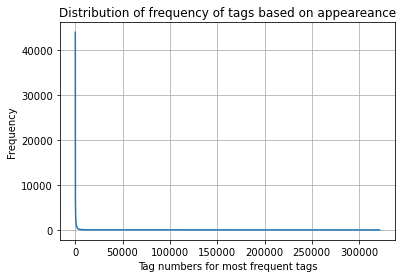

time: 398 ms (started: 2021-12-29 15:21:25 +01:00)


In [24]:
plt.plot(tag_df_sorted['Counts'].values)
plt.grid()
plt.title("Distribution of frequency of tags based on appeareance")
plt.xlabel("Tag numbers for most frequent tags")
plt.ylabel("Frequency")

### 3.3.2 - Frequence des mots  : Distribution des 100 premiers mots

Text(0, 0.5, 'Frequency')

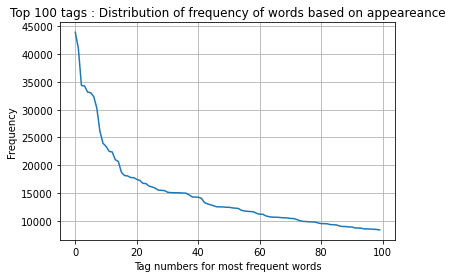

time: 264 ms (started: 2021-12-29 15:21:28 +01:00)


In [25]:
plt.plot(tag_df_sorted['Counts'][0:100].values)
plt.grid()
plt.title("Top 100 tags : Distribution of frequency of words based on appeareance")
plt.xlabel("Tag numbers for most frequent words")
plt.ylabel("Frequency")

### 3.3.3 - Frequence des mots  : Distribution en quantiles

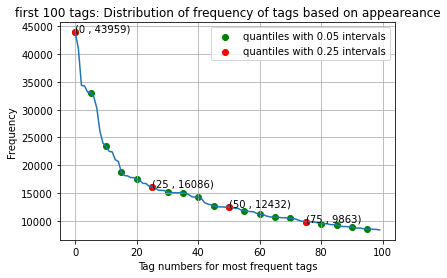

time: 422 ms (started: 2021-12-29 15:21:34 +01:00)


In [26]:
plt.plot(tag_df_sorted['Counts'][0:100].values)
plt.scatter(x=np.arange(0,100,5), y=tag_df_sorted['Counts'][0:100:5], c='g', label="quantiles with 0.05 intervals")
plt.scatter(x=np.arange(0,100,25), y=tag_df_sorted['Counts'][0:100:25], c='r', label = "quantiles with 0.25 intervals")
for x,y in zip(np.arange(0,100,25), tag_df_sorted['Counts'][0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.01, y+30))

plt.title('first 100 tags: Distribution of frequency of tags based on appeareance')
plt.grid()
plt.xlabel("Tag numbers for most frequent tags")
plt.ylabel("Frequency")
plt.legend()

### 3.3.4 - Frequence des mots  : Frequence de distribution

Text(0.5, 1.0, 'Distribution des mots')

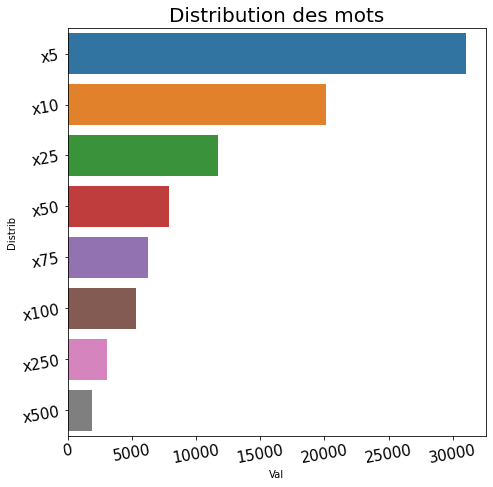

time: 860 ms (started: 2021-12-29 15:21:39 +01:00)


In [27]:
_5_fois   = tag_df_sorted[tag_df_sorted["Counts"]>5].shape[0]
_10_fois  = tag_df_sorted[tag_df_sorted["Counts"]>10].shape[0]
_25_fois  = tag_df_sorted[tag_df_sorted["Counts"]>25].shape[0]
_50_fois  = tag_df_sorted[tag_df_sorted["Counts"]>50].shape[0]
_75_fois  = tag_df_sorted[tag_df_sorted["Counts"]>75].shape[0]
_100_fois = tag_df_sorted[tag_df_sorted["Counts"]>100].shape[0]
_250_fois = tag_df_sorted[tag_df_sorted["Counts"]>250].shape[0]
_500_fois = tag_df_sorted[tag_df_sorted["Counts"]>500].shape[0]

lst = [['x5', _5_fois], ['x10', _10_fois], ['x25', _25_fois], ['x50', _50_fois],['x75', _75_fois],['x100', _100_fois], ['x250', _250_fois],['x500', _500_fois]]

lst_Df = pd.DataFrame(lst)
lst_Df= lst_Df.rename(columns={0: "Distrib", 1:'Val'})

plt.figure(figsize=(7.5, 7.5))
ax = sns.barplot(x='Val', y='Distrib', data=lst_Df, orient='h')
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=15, rotation=10)
plt.title('Distribution des mots', fontsize=20)

### 3.3.5 - Frequence des mots  :  n tags couvrent % des questions

Text(0, 0.5, 'Nb Words')

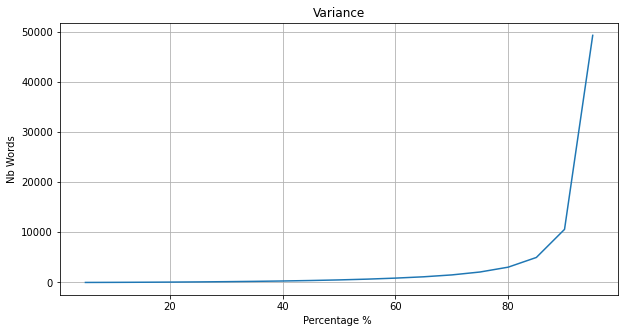

time: 352 ms (started: 2021-12-29 15:21:43 +01:00)


In [28]:
tag_df_sorted_1 = tag_df_sorted.copy()
_sum_ = tag_df_sorted_1['Counts'].sum()
tag_df_sorted_1['_sum_'] = _sum_
tag_df_sorted_1['Perc'] = tag_df_sorted_1['Counts'] / tag_df_sorted_1['_sum_']*100
tag_df_sorted_1['Perc_cumsum'] = tag_df_sorted_1['Perc'].cumsum()
tag_df_sorted_1 = tag_df_sorted_1.reset_index()
tag_df_sorted_1.pop('index')

tag_df_sorted_05 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 5]
tag_df_sorted_10 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 10]
tag_df_sorted_15 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 15]
tag_df_sorted_20 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 20]
tag_df_sorted_25 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 25]
tag_df_sorted_30 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 30]
tag_df_sorted_35 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 35]
tag_df_sorted_40 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 40]
tag_df_sorted_45 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 45]
tag_df_sorted_50 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 50]
tag_df_sorted_55 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 55]
tag_df_sorted_60 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 60]
tag_df_sorted_65 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 65]
tag_df_sorted_70 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 70]
tag_df_sorted_75 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 75]
tag_df_sorted_80 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 80]
tag_df_sorted_85 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 85]
tag_df_sorted_90 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 90]
tag_df_sorted_95 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 95]

lst = [[5,  tag_df_sorted_05.shape[0]],
[10, tag_df_sorted_10.shape[0]],
[15, tag_df_sorted_15.shape[0]],
[20, tag_df_sorted_20.shape[0]],
[25, tag_df_sorted_25.shape[0]],
[30, tag_df_sorted_30.shape[0]],
[35, tag_df_sorted_35.shape[0]],
[40, tag_df_sorted_40.shape[0]],
[45, tag_df_sorted_45.shape[0]],
[50, tag_df_sorted_50.shape[0]],
[55, tag_df_sorted_55.shape[0]],
[60, tag_df_sorted_60.shape[0]],
[65, tag_df_sorted_65.shape[0]],
[70, tag_df_sorted_70.shape[0]],
[75, tag_df_sorted_75.shape[0]],
[80, tag_df_sorted_80.shape[0]],
[85, tag_df_sorted_85.shape[0]],
[90, tag_df_sorted_90.shape[0]],
[95, tag_df_sorted_95.shape[0]]]
       
lst_df_ = pd.DataFrame(lst)
lst_df_ = lst_df_.rename(columns={0: "perc", 1: "nb_tags"})
lst_df_ = lst_df_.set_index('perc')

plt.figure(figsize=(10, 5))
plt.plot(lst_df_)
plt.grid()
plt.title("Variance")
plt.xlabel("Percentage % ")
plt.ylabel("Nb Words")

In [29]:
_50_most_important = tag_df_sorted_50.shape[0]
_75_most_important = tag_df_sorted_75.shape[0]
_90_most_important = tag_df_sorted_90.shape[0]

print(_50_most_important, "tags couvrent 50% des questions")
print(_75_most_important, "tags couvrent 75% des questions")
print(_90_most_important, "tags couvrent 90% des questions")

514 tags couvrent 50% des questions
2088 tags couvrent 75% des questions
10584 tags couvrent 90% des questions
time: 10.4 ms (started: 2021-12-29 15:21:50 +01:00)


### 3.3.6 - Wordcloud

In [ ]:
from wordcloud import WordCloud
tag_to_count_map
tupl = dict(tag_to_count_map.items())
word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tupl)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

### 3.3.7 - 15 tags + présent

In [ ]:
tag_df_sorted_Top_15 = tag_df_sorted.head(15)
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Counts', y='Tags', data=tag_df_sorted_Top_15, orient='h')
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=20, rotation=10)
plt.title('#15 premiers', fontsize=20)

# 4 - Export

In [ ]:
## y ----
#y_export = pd.DataFrame(new_r_df['New_Tags'])
#y_export.to_csv('y_export_v2.csv', index=False)

In [ ]:
# X ----
#X_export = pd.DataFrame(new_df['Sentence'])
#X_export = X_export.reset_index()
#X_export.pop('index')
#X_export.to_csv('X_export_v2.csv', index=False)